In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [3]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [4]:
1## displaying random sample
df['date'].sample(n=10).sort_index()

90      1979-04-01
4385    1991-01-03
6639    1997-03-06
7894    2000-08-12
9778    2005-10-09
10631   2008-02-09
12324   2012-09-28
12683   2013-09-22
14159   2017-10-07
15244   2020-09-26
Name: date, dtype: datetime64[ns]

In [5]:
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00


In [6]:
df = df.set_index('date')

In [7]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [8]:
df = df.loc['2000':,['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


In [9]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [10]:
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [11]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [12]:
precip_col = ['precipitation']
q1_df = df.loc['2000':'2010',precip_col].copy()
q1_df


,precipitation
date,
2000-01-01,0.00
2000-01-02,0.20
2000-01-03,6.00
2000-01-04,0.20
2000-01-05,0.80
...,...
2010-12-27,5.00
2010-12-28,0.40
2010-12-29,1.40


In [13]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2000-01-01 to 2010-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  4018 non-null   float64
dtypes: float64(1)
memory usage: 62.8 KB


In [14]:
q1_df = q1_df['precipitation'].resample('MS').sum()

In [15]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_month = mdates.DateFormatter("%b")


## for major year ticks
loc_year = mdates.YearLocator(1)
fmt_year = mdates.DateFormatter("%Y")

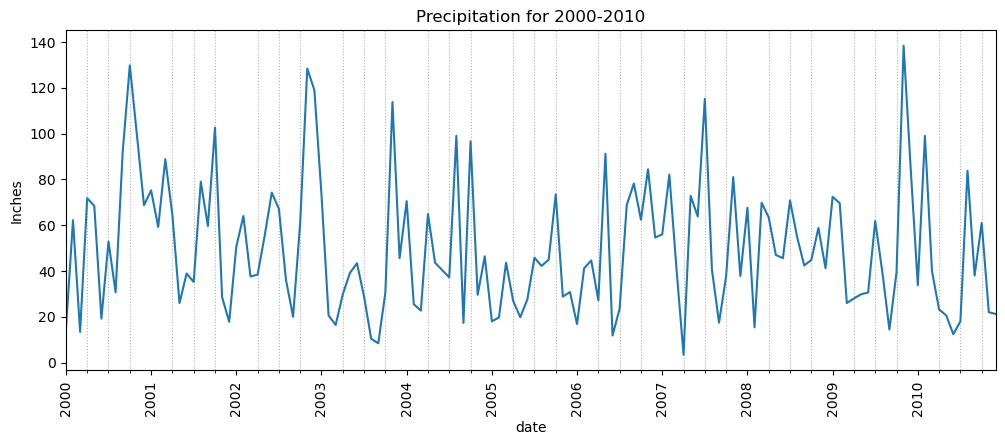

In [16]:
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,5))
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_month)
## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
q1_df.plot(ax=ax,title='Precipitation for 2000-2010', ylabel='Inches')
fig.autofmt_xdate(rotation=90,ha='center')


In [17]:
q2_df = df.loc['2000':]
q2_df 

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,0.00
2020-12-28,0.20,1.10,-1.30,3.60,0.00
2020-12-29,0.00,2.60,1.10,4.10,0.00


In [18]:
q2_df = q2_df['mean_temp'].resample('AS').mean()

In [19]:
loc_y = mdates.YearLocator(5)



## for major year ticks
loc_year = mdates.YearLocator(1)
fmt_year = mdates.DateFormatter("%Y")

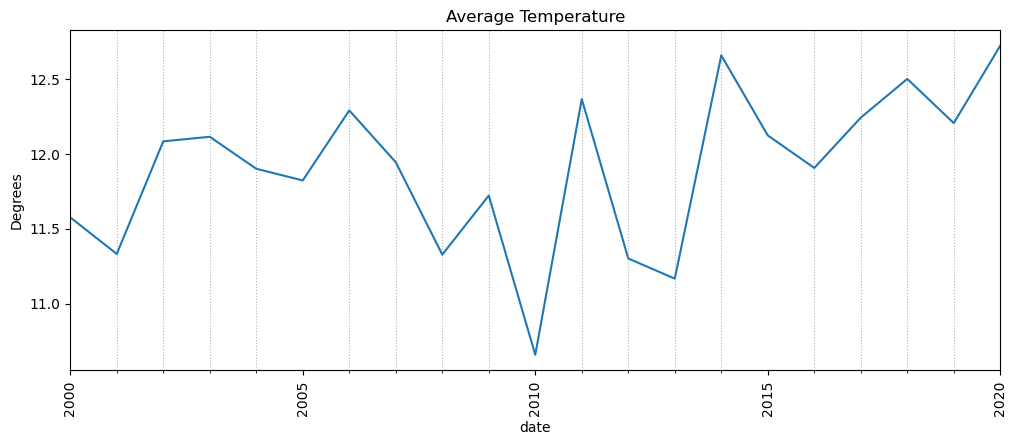

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
## customize minor ticks
ax.xaxis.set_minor_locator(loc_y)

## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
q2_df.plot(ax=ax,title='Average Temperature', ylabel='Degrees')
fig.autofmt_xdate(rotation=90,ha='center')

 Which year between 2000-2020 had the coolest average temperature?

In [21]:
df = df.loc['2000':]
date_mean = df['mean_temp'].idxmax()
mean_temp = df['mean_temp'].max()

print(f"The lowest temperature of {mean_temp} degrees occured on {date_mean.strftime('%B %d, %Y')}.")

The lowest temperature of 29.0 degrees occured on August 10, 2003.


- 2003 has the coolest average temperature.

 What month had the most precipitation between 2000 through 2010?

In [22]:
df = df.loc['2000':'2010']
date_precip = df['precipitation'].idxmax()
precip = df['precipitation'].max()

print(f"The highest daily preciptation was {precip} inches, which occured on {date_precip.strftime('%B %d, %Y')} which was a {date_precip.day_name()}.")

The highest daily preciptation was 36.6 inches, which occured on October 29, 2000 which was a Sunday.


- October of 2000 has the most precipitation betweens the years 2000 and 2010.